# Topic modeling

In [1]:
# Import necessary libraries
import pandas as pd
import gensim
from gensim import corpora, models

In [2]:
# Load the hotel review dataset
df=pd.read_csv("/Users/asmak/Desktop/Tripadvisor.csv")

In [3]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [7]:
# Tokenize the Review column and assign to the variable as 'review'
reviews = df['Review'].tolist()
reviews = [gensim.utils.simple_preprocess(review) for review in reviews]

In [9]:
# Create a dictionary from the preprocessed reviews
dictionary = corpora.Dictionary(reviews)

In [10]:
# Create a document-term matrix from the reviews
doc_term_matrix = [dictionary.doc2bow(review) for review in reviews]

In [13]:
# Create an LDA model with 2 topics
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=2, id2word=dictionary, passes=10)

In [14]:
# Show the topics and their corresponding keywords
topics = lda_model.show_topics(num_topics=5, num_words=10)
for topic in topics:
    print(topic)

(0, '0.018*"not" + 0.010*"beach" + 0.009*"did" + 0.009*"room" + 0.009*"food" + 0.008*"resort" + 0.008*"pool" + 0.007*"good" + 0.007*"great" + 0.007*"time"')
(1, '0.039*"hotel" + 0.022*"room" + 0.012*"great" + 0.012*"not" + 0.010*"stay" + 0.010*"staff" + 0.009*"location" + 0.009*"good" + 0.008*"rooms" + 0.007*"breakfast"')


In [15]:
# Assign topics to each document in the corpus
for i, doc in enumerate(doc_term_matrix):
    topics = lda_model.get_document_topics(doc)
    print(f"Document {i}: {topics}")

Document 0: [(0, 0.013510574), (1, 0.9864894)]
Document 1: [(0, 0.296067), (1, 0.703933)]
Document 2: [(0, 0.2561866), (1, 0.7438134)]
Document 3: [(0, 0.08288341), (1, 0.9171166)]
Document 4: [(0, 0.53059494), (1, 0.46940503)]
Document 5: [(0, 0.34206417), (1, 0.65793586)]
Document 6: [(1, 0.9931067)]
Document 7: [(0, 0.28987166), (1, 0.7101283)]
Document 8: [(0, 0.019030172), (1, 0.98096985)]
Document 9: [(0, 0.019318147), (1, 0.98068184)]
Document 10: [(0, 0.018886901), (1, 0.98111314)]
Document 11: [(0, 0.07906456), (1, 0.9209354)]
Document 12: [(1, 0.9916763)]
Document 13: [(0, 0.6612178), (1, 0.33878222)]
Document 14: [(0, 0.022047957), (1, 0.97795206)]
Document 15: [(0, 0.6778227), (1, 0.32217732)]
Document 16: [(0, 0.44032648), (1, 0.55967355)]
Document 17: [(1, 0.99455243)]
Document 18: [(0, 0.02720771), (1, 0.97279227)]
Document 19: [(0, 0.414857), (1, 0.585143)]
Document 20: [(0, 0.10081644), (1, 0.8991836)]
Document 21: [(0, 0.031274922), (1, 0.9687251)]
Document 22: [(0, 0

In [22]:
import pandas as pd
import gensim
from gensim import corpora
from pyLDAvis import gensim_models
import pyLDAvis

In [26]:
# Convert the LDA model that can be visualized using pyLDAvis

vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)

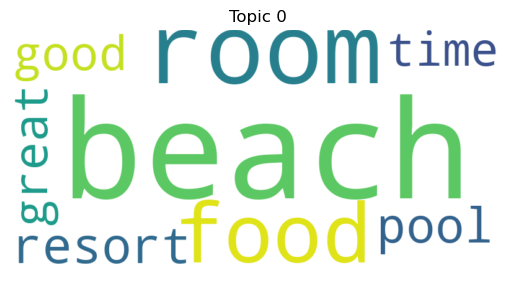

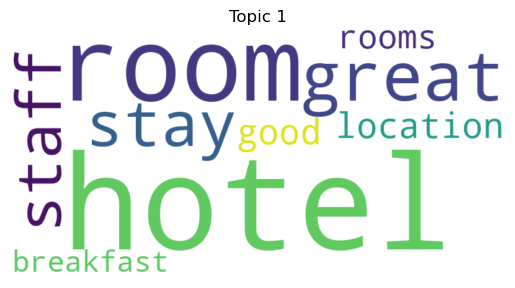

In [30]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Iterate over each topic
for i in range(len(lda_model.show_topics())):
    # Get the top 10 keywords for the current topic
    topic_words = dict(lda_model.show_topics(formatted=False)[i][1])
    topic_words = {k:v for k, v in topic_words.items() if len(k) > 3} # Only select keywords with length > 3
    # Create a word cloud for the current topic
    wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wc.generate_from_frequencies(topic_words)
    # Display the word cloud for the current topic
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {i}")

Insights: Above cloud word is reflecting the most representative keywords for this topic. These words are arrange in 
a decreasing order, The most important word is the largest and the least important word is smallest. The size of word 
is representing their importance within the topic.
